In [22]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.stats as st

%matplotlib inline

In [23]:
# Gamma
a, p = 4, 2
scale = 1/a
shape = p

# Poisson
lambd = 10

##### 1) (2b) Simulujte jednu trajektorii $\{N_t(\omega) \mid t\in(0,10~\mathrm{s})\}$. Průběh trajektorie graficky znázorněte.

In [24]:
def trajectory(t, steps_per_second = 10):
    n = st.poisson.rvs(mu=lambd*t, size=1)
    print(f'{n=}')
    T = st.uniform.rvs(scale=t, size=n)
    T.sort()
    S = st.gamma.rvs(a=shape, scale=scale, size=n)
    gmean = st.gamma.mean(a=shape, scale=scale)
    print(f'{gmean=}')
    steps = np.arange(0,t,1/steps_per_second)
    N = np.zeros(shape=(len(steps),2))

    for j, s in enumerate(steps):
        cnt = 0
        for t_i, d_i in zip(T,S):
            if t_i <= s and s <= t_i+d_i:
                cnt += 1

        N[j][0] = s
        N[j][1] = cnt
    return N

def rvs(t, steps_per_second=10):
    n = st.poisson.rvs(mu=lambd*t, size=1)
    T = st.uniform.rvs(scale=t, size=n)
    T.sort()
    S = st.gamma.rvs(a=shape, scale=scale, size=n)

    cnt = 0
    s = t - 1/steps_per_second
    for t_i, d_i in zip(T,S):
        if t_i <= s and s <= t_i+d_i:
            cnt += 1
    return cnt

n=array([95])
gmean=0.5


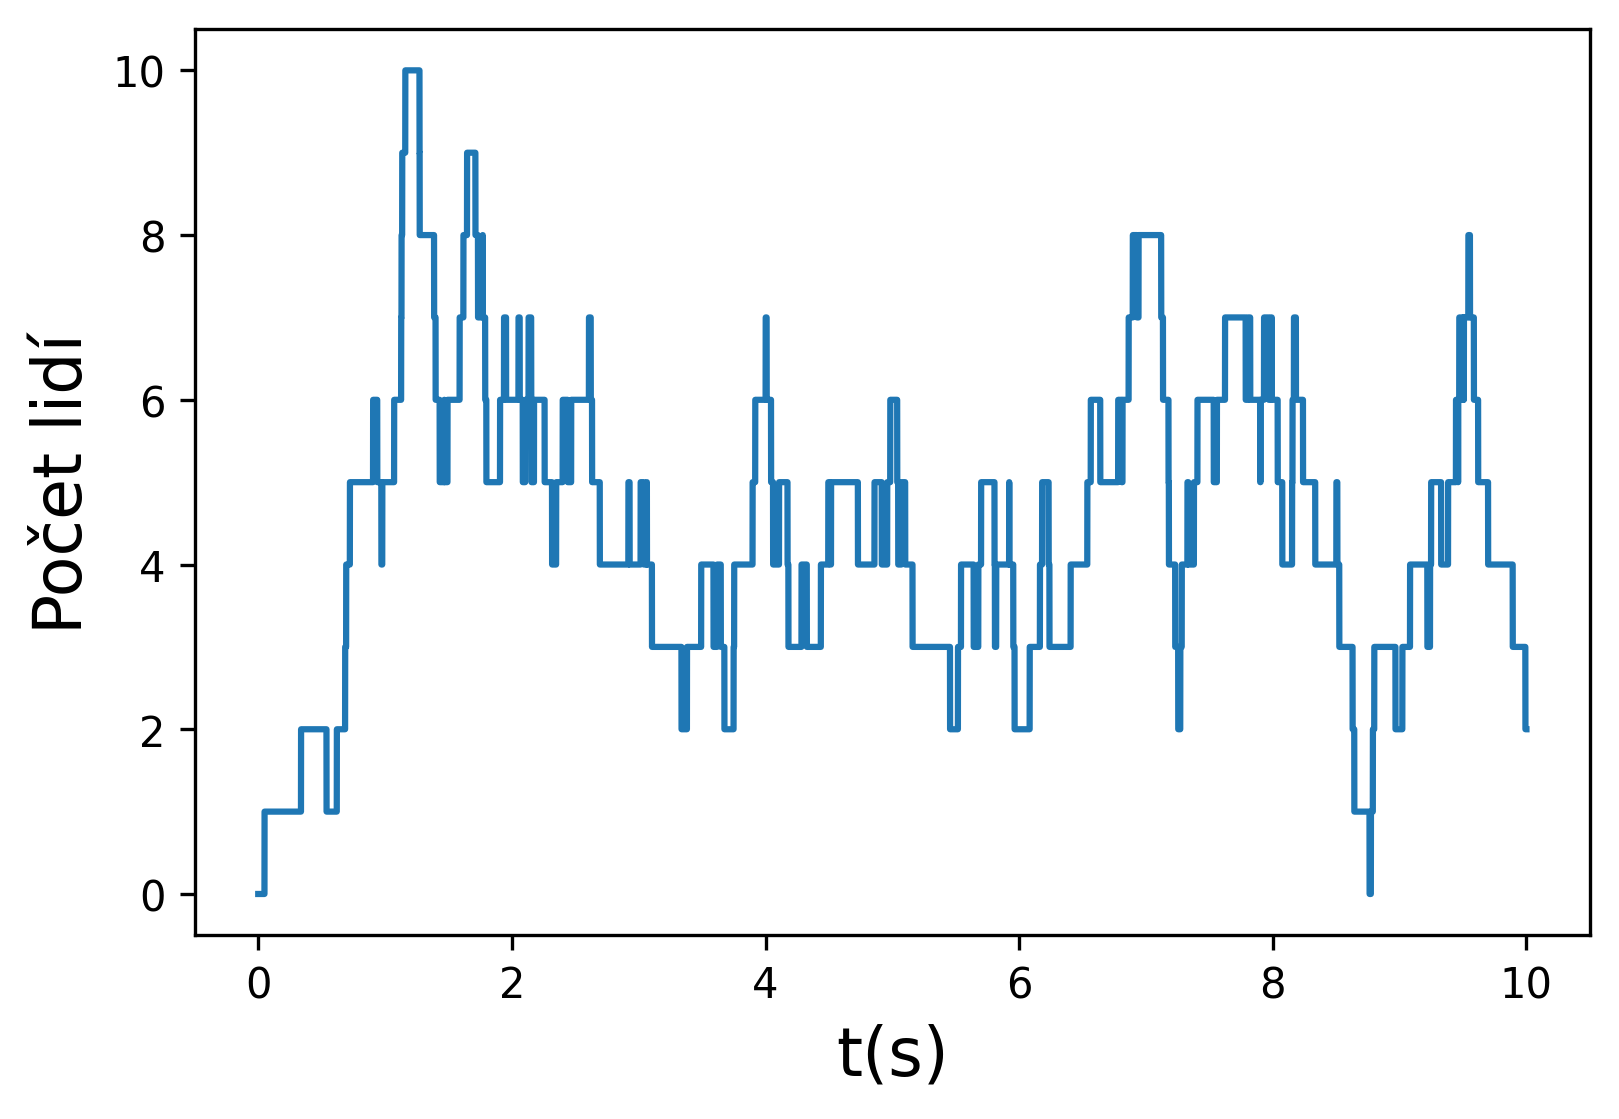

In [25]:
fig, ax = plt.subplots()
fig.set_dpi(300)

x, y = zip(*trajectory(10, 100000))
ax.plot(x, y)
ax.set_xlabel('t(s)', size=16)
ax.set_ylabel('Počet lidí', size=16)
fig.savefig('img/traj.png', dpi=300)


##### 2) (2b) Simulujte $n = 500$ nezávislých trajektorií pro $t\in(0,100)$. Na základě těchto simulací odhadněte rozdělení náhodné veličiny $N_{100}$.

In [26]:
n = 500
N_distr = []

for i in range(n):
    N = rvs(t = 100)
    N_distr.append(N)

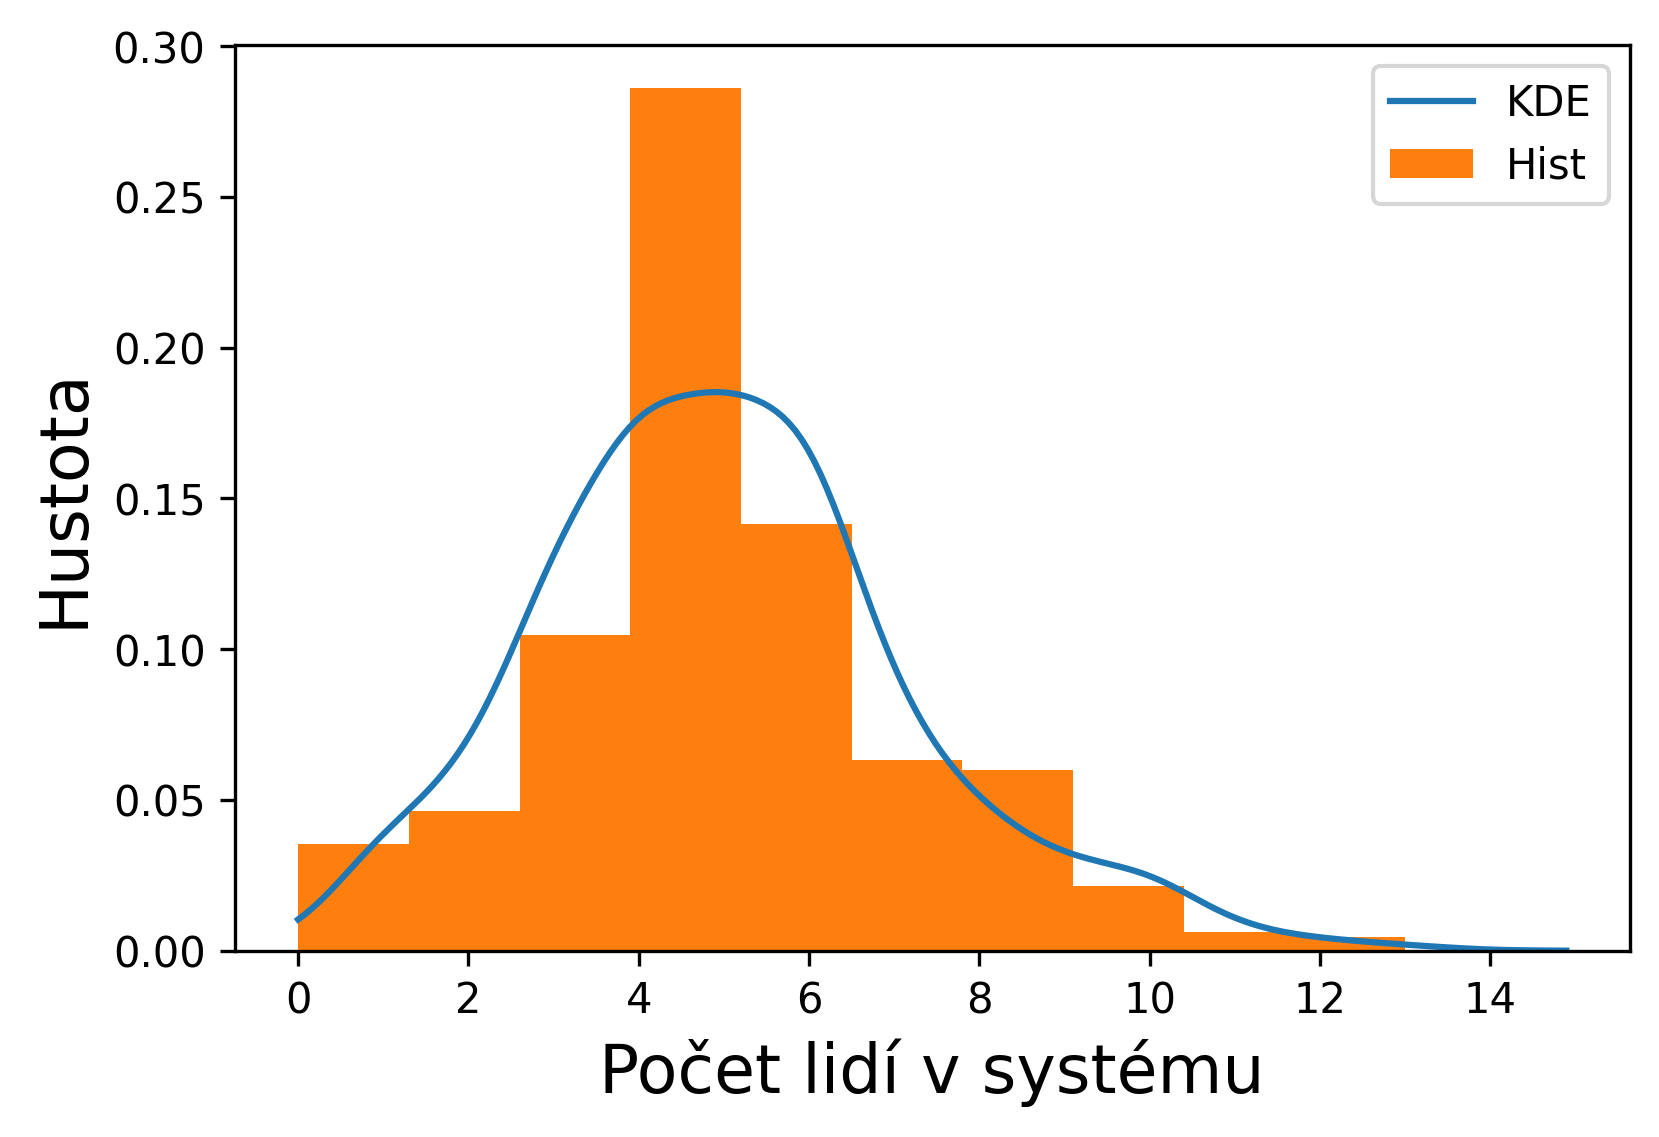

In [27]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_dpi(300)
ax = sns.kdeplot(data=N_distr, clip=(0,None), label='KDE')
ax.hist(N_distr, density=True, label='Hist')
ax.set_ylabel('Hustota', size=16)
ax.set_xlabel('Počet lidí v systému', size=16)
ax.legend()
fig.savefig('img/histkde.png', dpi=300)

##### 3) (2b) Diskutujte, jaké je limitní rozdělení tohoto systému pro $t\to+\infty$ (vizte přednášku 23.). Pomocí vhodného testu otestujte na hladině významnosti 5\%, zda výsledky simulace $N_{100}$ odpovídají tomuto rozdělení.